In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../../dane.csv")

In [3]:
#Let's separate/unite some columns to get more information to analyze

data[['First Name', 'Last Name']] = data['Name'].str.split(' ', expand=True)
data[['CabinDeck', 'CabinNum', 'CabinSide']] = data['Cabin'].str.split('/', expand=True)
data[['GroupId', 'IdInGroup']] = data['PassengerId'].str.split('_', expand=True)
data['TotalSpendings'] = data[['RoomService', 'Spa', 'ShoppingMall', 'FoodCourt', 'VRDeck']].sum(axis=1, skipna=True)

data = data.drop(['Name', 'Cabin'], axis='columns')

In [4]:
data.to_csv(r'data_separated.csv', index = False)

In [5]:
data_separated = pd.read_csv("data_separated.csv")
data_separated

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,First Name,Last Name,CabinDeck,CabinNum,CabinSide,GroupId,IdInGroup,TotalSpendings
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,Maham,Ofracculy,B,0.0,P,1,1,0.0
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,Juanna,Vines,F,0.0,S,2,1,736.0
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,Altark,Susent,A,0.0,S,3,1,10383.0
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,Solam,Susent,A,0.0,S,3,2,5176.0
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,Willy,Santantines,F,1.0,S,4,1,1091.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,Gravior,Noxnuther,A,98.0,P,9276,1,8536.0
8689,9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,Kurta,Mondalley,G,1499.0,S,9278,1,0.0
8690,9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,Fayey,Connon,G,1500.0,S,9279,1,1873.0
8691,9280_01,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,Celeon,Hontichre,E,608.0,S,9280,1,4637.0


<span style="font-size: 28px;font-weight: bold;">1. Analysing how and where money is spent</span>

<span style="font-size: 18px;font-weight: bold;">1.1 Can people in CryoSleep spend money?</span>


In [6]:
data_separated[data_separated['CryoSleep'] == True]['TotalSpendings'].sum()

0.0

<p style="color: red;font-size: 18px;">1.1. Interesting fact : </p>
<ul>
  <li>People in CryoSleep do not spend money at all.</li>
  <li>We have to take it into account when analyse the spending data.</li>
</ul>

<span style="font-size: 18px;font-weight: bold;">1.2 How does spending money depend on CabinDeck and VIP status?</span>


In [7]:
data_not_in_cryosleep = data_separated[data_separated['CryoSleep'] == False]
data_mean_spendings_deck_vip =data_not_in_cryosleep\
.groupby(['CabinDeck', 'VIP'], as_index = False)\
        .agg({'TotalSpendings': 'mean', 'RoomService': 'mean', 'ShoppingMall':'mean', 'FoodCourt': 'mean', 'Spa':'mean', 'VRDeck':'mean'})

column_mapping = {
    'TotalSpendings': 'MeanTotalSpendings',
    'RoomService': 'MeanRoomService',
    'ShoppingMall': 'MeanShoppingMall',
    'FoodCourt': 'MeanFoodCourt',
    'Spa': 'MeanSpa',
    'VRDeck': 'MeanVRDeck'
}

data_mean_spendings_deck_vip = data_mean_spendings_deck_vip.rename(columns=column_mapping)
data_mean_spendings_deck_vip


,CabinDeck,VIP,MeanTotalSpendings,MeanRoomService,MeanShoppingMall,MeanFoodCourt,MeanSpa,MeanVRDeck
0,A,False,4589.789116,216.820690,178.370629,2039.292517,977.448980,1218.825175
1,A,True,5667.156250,82.741935,88.933333,2642.187500,949.656250,1911.781250
2,B,False,6318.161184,205.089701,342.536913,2687.308970,1596.865772,1553.180921
3,B,True,7945.294118,111.382353,390.470588,3561.411765,1763.176471,2183.060606
4,C,False,6922.441860,272.754617,319.902887,3041.856764,1654.218997,1798.939153
5,C,True,7004.483871,203.967742,172.100000,3484.433333,805.600000,2482.322581
6,D,False,3007.856269,851.238245,433.586957,779.301242,645.512579,364.266458
7,D,True,2403.142857,1029.629630,138.888889,649.535714,271.142857,355.678571
8,E,False,1630.572727,394.510769,283.226502,334.824885,331.258165,316.299383
9,E,True,1367.733333,293.428571,456.933333,362.333333,239.133333,35.466667


[Text(0.5, 1.0, 'MeanVRDeck depending on Deck and VIP status')]

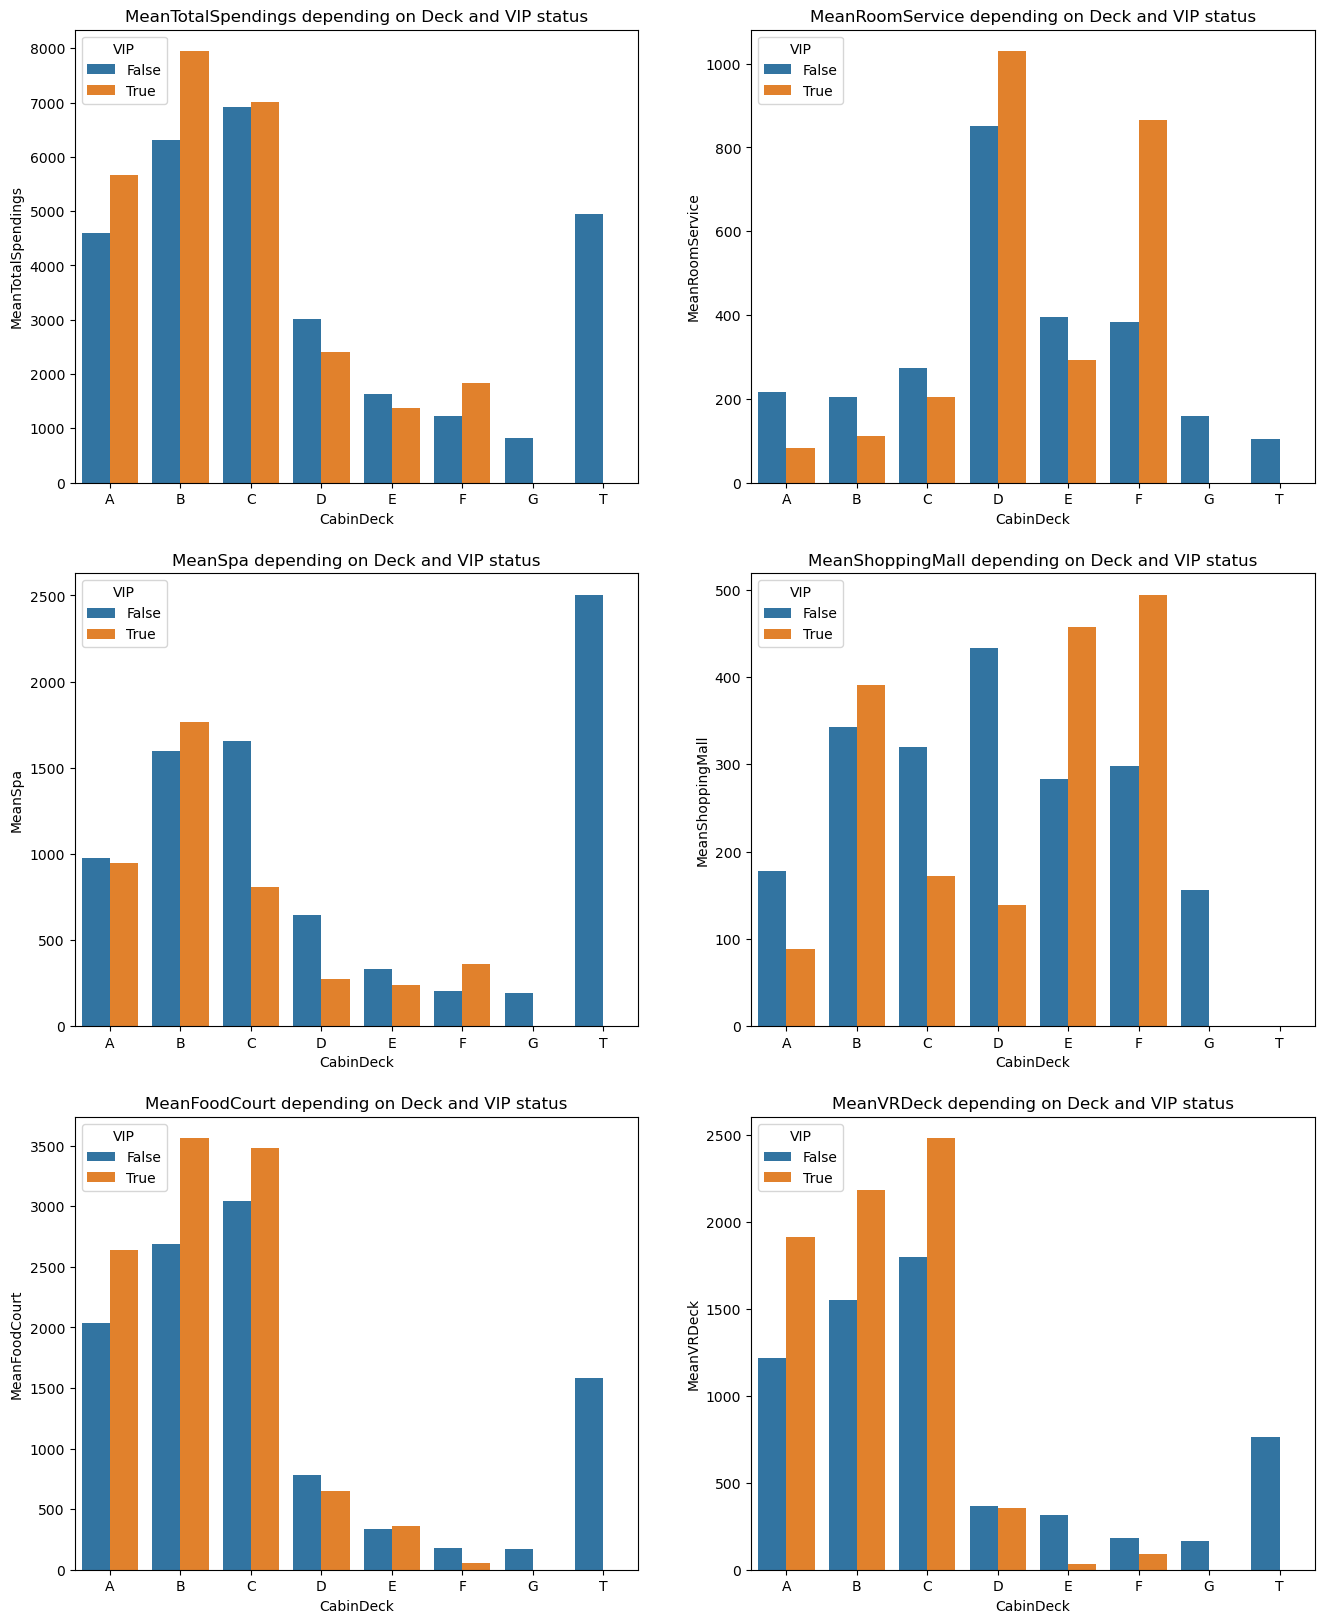

In [8]:
fig, axes = plt.subplots(3, 2, figsize=(16, 20))

sns.barplot(ax = axes[0,0],x='CabinDeck', y='MeanTotalSpendings', data=data_mean_spendings_deck_vip, hue='VIP').set(title='MeanTotalSpendings depending on Deck and VIP status')

sns.barplot(ax = axes[0,1],x='CabinDeck', y='MeanRoomService', data=data_mean_spendings_deck_vip, hue='VIP').set(title='MeanRoomService depending on Deck and VIP status')

sns.barplot(ax = axes[1,0],x='CabinDeck', y='MeanSpa', data=data_mean_spendings_deck_vip, hue='VIP').set(title='MeanSpa depending on Deck and VIP status')

sns.barplot(ax = axes[1,1],x='CabinDeck', y='MeanShoppingMall', data=data_mean_spendings_deck_vip, hue='VIP').set(title='MeanShoppingMall depending on Deck and VIP status')

sns.barplot(ax = axes[2,0],x='CabinDeck', y='MeanFoodCourt', data=data_mean_spendings_deck_vip, hue='VIP').set(title='MeanFoodCourt depending on Deck and VIP status')

sns.barplot(ax = axes[2,1],x='CabinDeck', y='MeanVRDeck', data=data_mean_spendings_deck_vip, hue='VIP').set(title='MeanVRDeck depending on Deck and VIP status')



<p style="color: red;font-size: 18px;"> 1.2 Some results from these plots : </p>
<ul>
   <p>    * Here I took into account  only people who could spend money (not in CryoSleep), because that makes more sense when I take mean values.</p>
  <li>There are no people who spent money and has a VIP status in CabinDecks G and T</li>
  <li>People from Deck T spend a LOT OF MONEY on spa</li>
  <li>Top 3 Decks that a lot of spend money: Deck B, Deck C, Deck A</li>
</ul>

<span style="font-size: 18px;font-weight: bold;">1.3 How does spending money depend on Age?</span>

In [9]:
labels = ['0-6', '7-12', '13-18', '19-24', '25-30', '31-36', '37-42', '43-48', '49-54', '55-60', '61-66', '67-72', '73-78', '79-84']
bins = list(range(-1, 85, 6))

data_mean_spendings_age = data_not_in_cryosleep.copy()
data_mean_spendings_age.loc[:, 'AgeGroup'] = pd.cut(data_not_in_cryosleep['Age'], bins=bins, labels=labels)
data_mean_spendings_age =data_mean_spendings_age\
        .groupby(['AgeGroup'])\
        .agg({'TotalSpendings': 'mean', 'RoomService': 'mean', 'ShoppingMall':'mean', 'FoodCourt': 'mean', 'Spa':'mean', 'VRDeck':'mean'})
data_mean_spendings_age

,TotalSpendings,RoomService,ShoppingMall,FoodCourt,Spa,VRDeck
AgeGroup,,,,,,
0-6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7-12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
13-18,1542.189119,396.142091,414.659686,273.944591,261.550532,231.265957
19-24,1532.579079,344.538132,287.510675,303.490163,344.153316,290.669244
25-30,2516.060019,374.688801,309.337624,869.456262,439.499022,575.548228
31-36,2953.011445,451.122449,265.766520,999.087083,682.632047,613.611833
37-42,3237.389351,369.994941,292.812183,1197.740238,690.888325,748.599659
43-48,2766.985782,409.605327,308.772947,954.503597,564.871671,578.137681
49-54,2760.075472,320.334615,205.129771,1030.431907,713.900383,553.050193


[Text(0.5, 1.0, 'Spendings depending on Age and Category')]

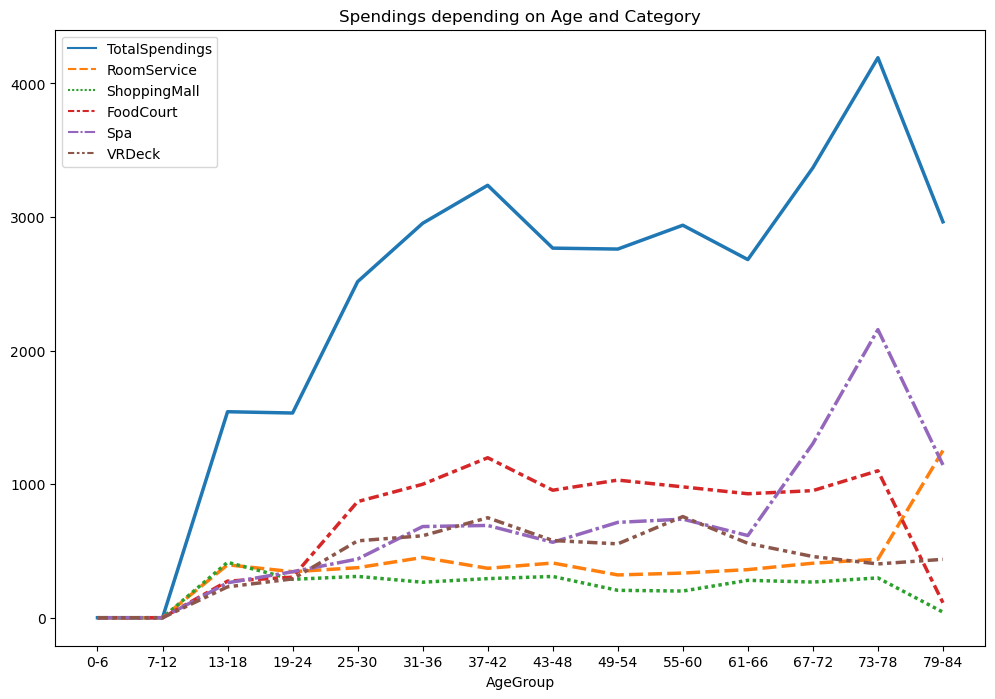

In [10]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=data_mean_spendings_age, linewidth=2.5).set(title = "Spendings depending on Age and Category")

<p style="color: red;font-size: 18px;"> 1.3 Some results from this plot : </p>
<ul>
   <p>    * Here I took into account only people who could spend money (not in CryoSleep), because that makes more sense when I take mean values.</p>
  <li>Children up to and including 12 years of age do not spend money</li>
  <li>Spending money on shopping and roomservice does not depend on age</li>
  <li>At the age of 25 people start spending more money on food</li>
  <li>Spa spendings increase according to age</li>
</ul>

<span style="font-size: 18px;font-weight: bold;">1.4. What people on different planets spend their money on?</span>

/Users/katebokhan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


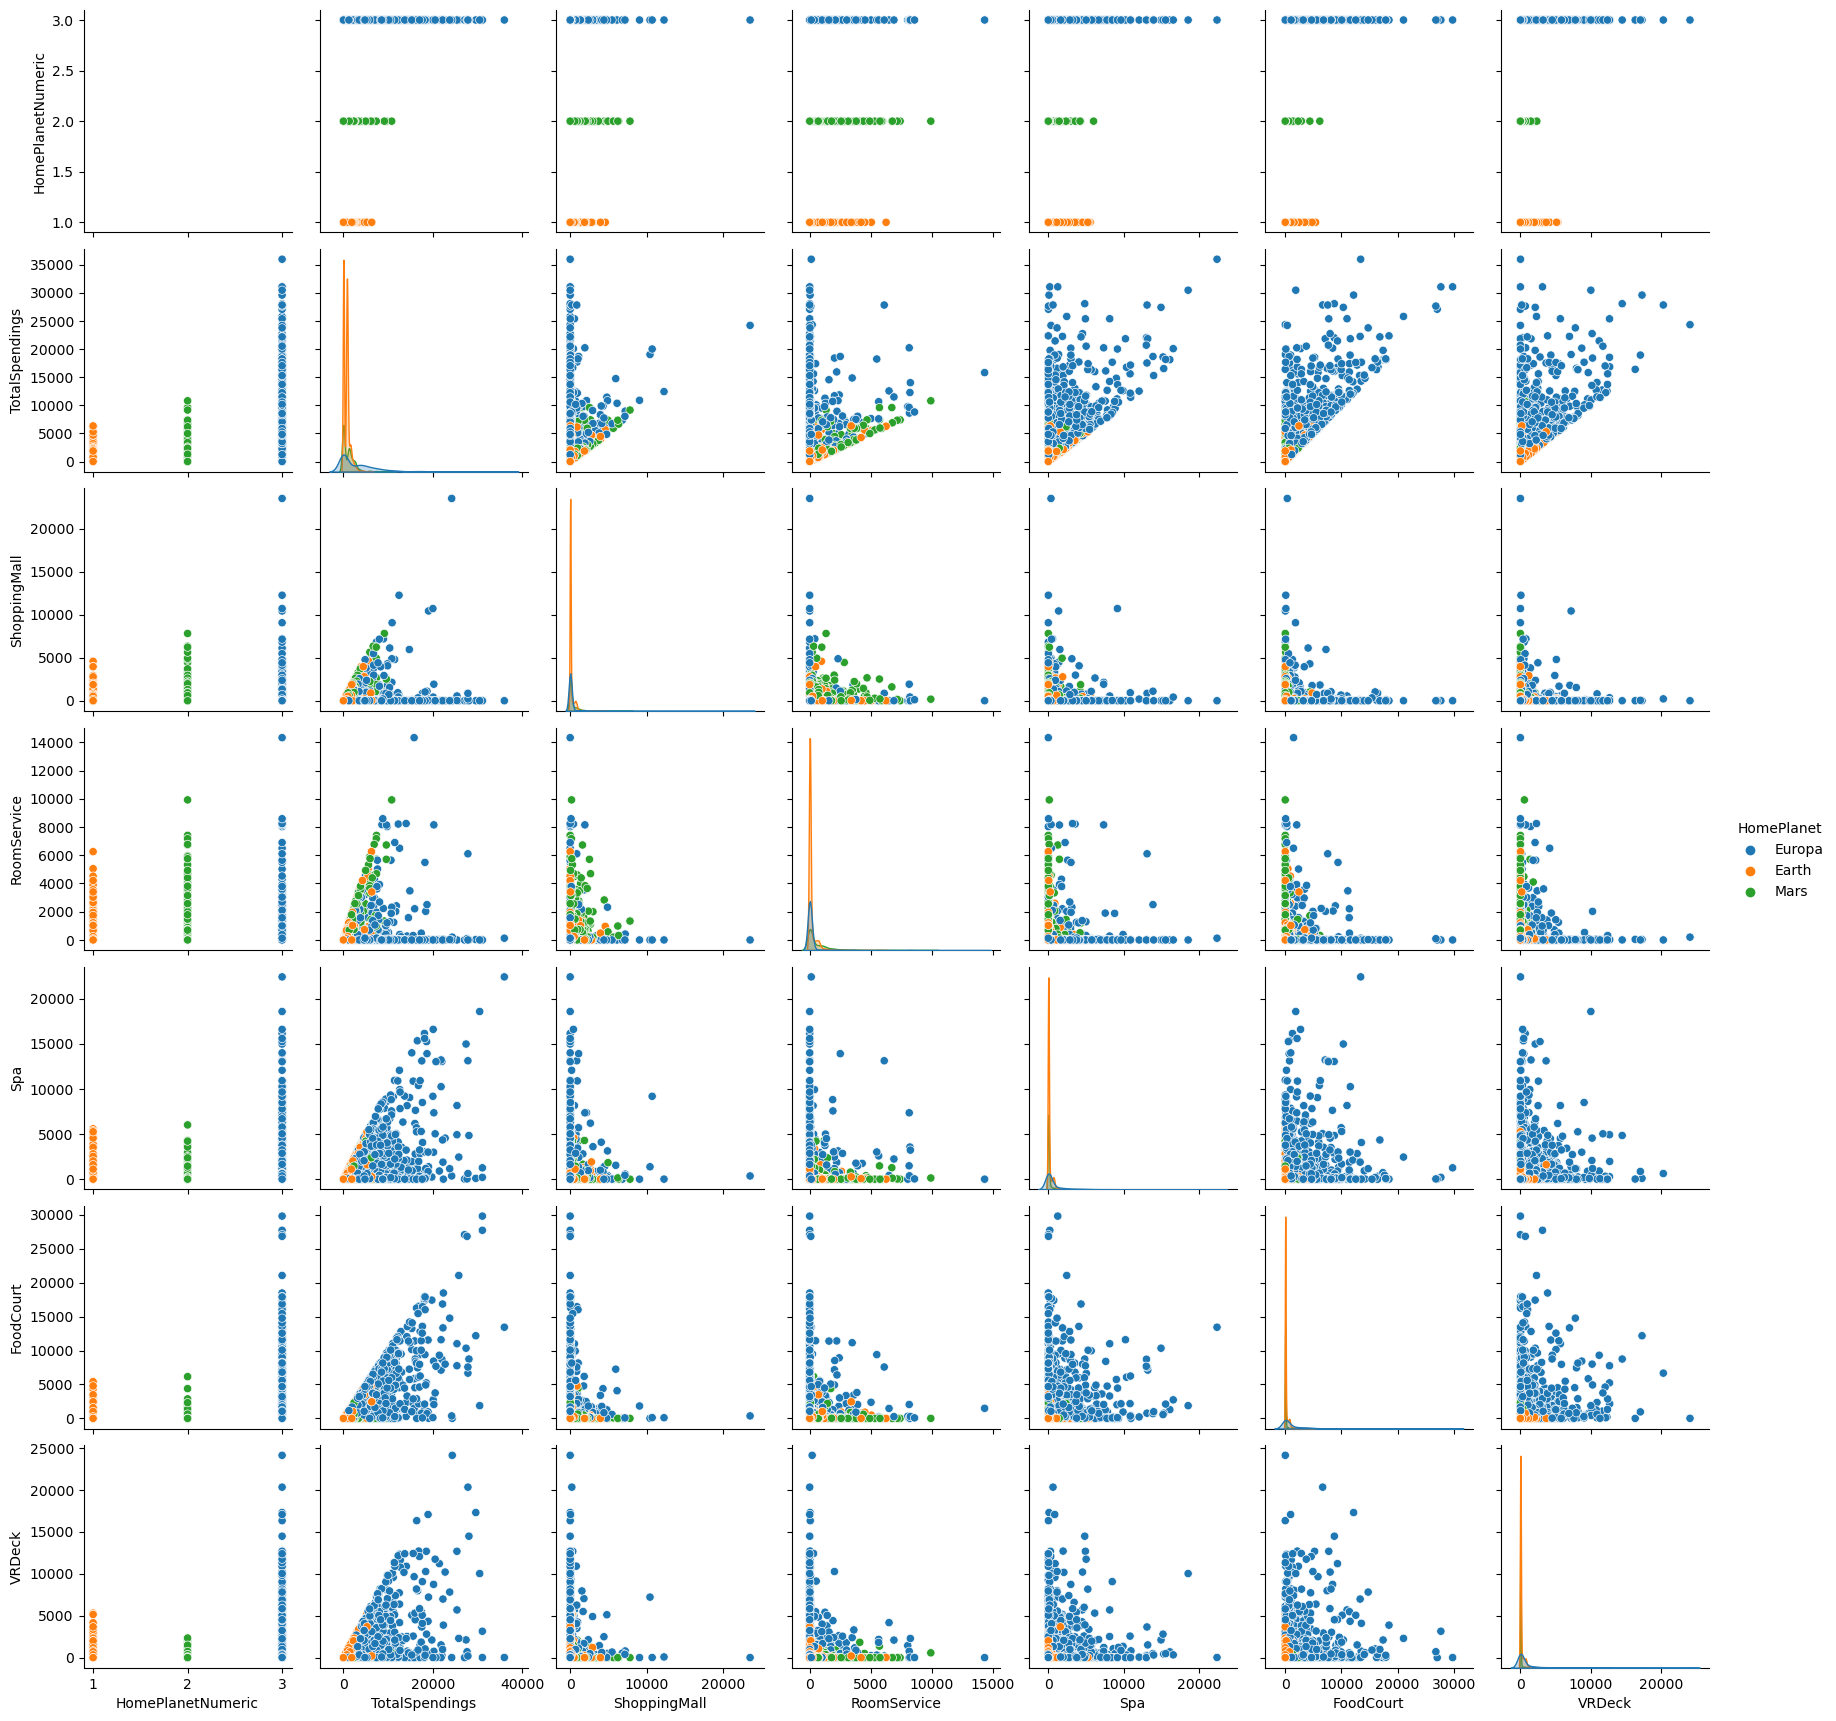

In [11]:
data_separated = pd.read_csv("data_separated.csv")
planet_mapping = {'Earth': 1, 'Mars': 2, 'Europa': 3}
data_separated['HomePlanetNumeric'] = data_separated['HomePlanet'].map(planet_mapping)

sns.pairplot(data_separated[['HomePlanetNumeric','TotalSpendings', 'ShoppingMall', 'HomePlanet', 'RoomService', 'Spa', 'FoodCourt','VRDeck']], hue="HomePlanet")

<p style="color: red;font-size: 18px;"> 1.4. Some results from this plot : </p>
<ul>
  <li>People from Earth spend more money than people from Mars, Europa in every Category</li>
  <li>People from all planets spend quite a lot of money on RoomService</li>
  <li>People from Mars spend less money on VRDeck than people from other planets</li>
</ul>

<span style="font-size: 28px;font-weight: bold;">2. Analysing what influences the Transportation and choosing CryoSleep</span>

<span style="font-size: 18px;font-weight: bold;">2.1 How does the Transportation depend on CryoSleep?</span>

Text(0.5, 1.0, 'Transportation coefficient depending on CryoSleep')

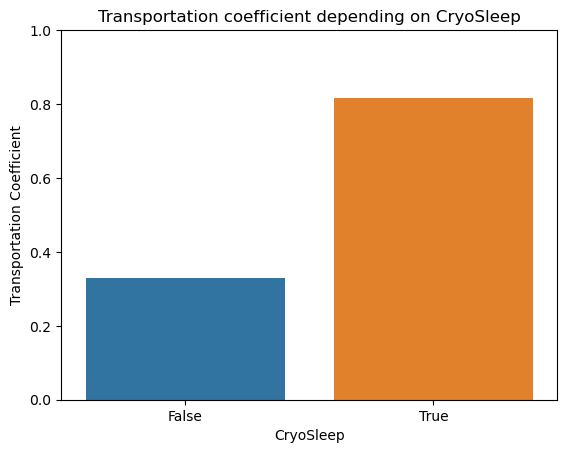

In [12]:
data_cryosleep_transported = data_separated.groupby('CryoSleep')['Transported'].mean().reset_index()
sns.barplot(data=data_cryosleep_transported, x='CryoSleep', y='Transported')
plt.ylim(0, 1)


plt.ylabel('Transportation Coefficient')
plt.title('Transportation coefficient depending on CryoSleep')

<p style="color: red;font-size: 18px;"> 2.1. Result: </p>
<ul>

  <li>81,18% of the people who were in CryoSleep were transported.</li>
  <li>Only 32,89% of the people who were not in CryoSleep were transported</li>
  <li>CryoSleep is a very important feature value in predicting whether a person was transoprted or no.</li>
</ul>

In [13]:
data_CryoSleep = data_separated[data_separated['CryoSleep'] == True]
data_not_CryoSleep = data_separated[data_separated['CryoSleep'] == False]
data_CryoSleep.shape[0]

3037

In [14]:
data_not_CryoSleep.shape[0]

5439

So, there are 3037 observations, where people were in CryoSleep and 5439 observations where people were not in CryoSleep.

<span style="font-size: 18px;font-weight: bold;">2.2 What influences the  transportation when people are in the CryoSleep? </span>

In [15]:
data_barplot = data_CryoSleep.groupby('CabinDeck')\
    .agg(transportation_coeff=('Transported', 'mean'),
         number_of_observations=('Transported', 'count')).reset_index()\
    .sort_values(by='transportation_coeff', ascending=False)
data_barplot

,CabinDeck,transportation_coeff,number_of_observations
2,C,0.993197,294
1,B,0.992840,419
3,D,0.990385,104
5,F,0.985455,550
0,A,0.941176,68
6,G,0.659259,1350
4,E,0.648810,168


(0.0, 1.0)

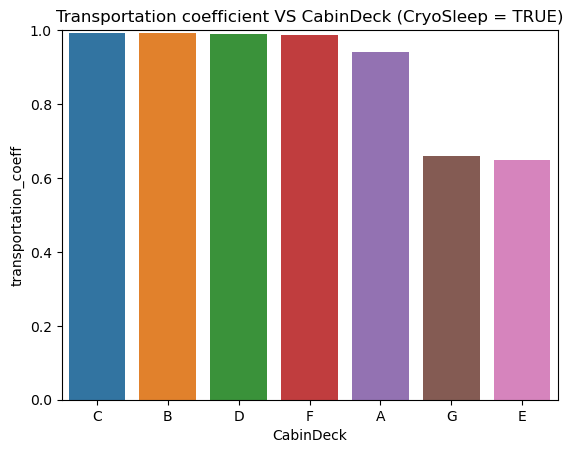

In [16]:
sns.barplot(data=data_barplot, x='CabinDeck', y='transportation_coeff').set(title="Transportation coefficient VS CabinDeck (CryoSleep = TRUE)")
plt.ylim(0, 1)

<p style="color: red;font-size: 18px;"> Important results from this plot: </p>
<ul>
  <li>99.3197% of people, who were in CryoSleep and were in deck C were transported (only 2 people out of 294 were not transported)</li>
  <li>99.2840% of people, who were in CryoSleep and were in deck B were transported (only 3 people out of 419 were not transported)</li>
  <li>99.0385% of people, who were in CryoSleep and were in deck D were transported (only 1 person out of 104 were not transported)</li>
  <li>98.5455% of people, who were in CryoSleep and were in deck F were transported (only 8 people out of 550 were not transported)</li>
</ul>

In [17]:
data_barplot = data_CryoSleep.groupby('Destination')\
    .agg(transportation_coeff=('Transported', 'mean'),
         number_of_observations=('Transported', 'count')).reset_index()\
    .sort_values(by='transportation_coeff', ascending=False)
data_barplot

,Destination,transportation_coeff,number_of_observations
0,55 Cancri e,0.928281,739
2,TRAPPIST-1e,0.797001,1867
1,PSO J318.5-22,0.689295,383


(0.0, 1.0)

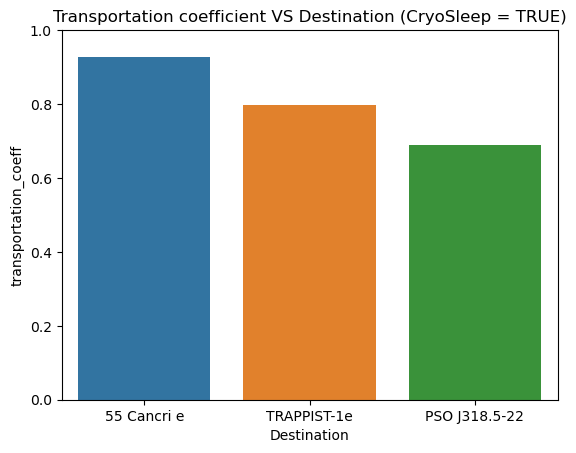

In [18]:
sns.barplot(data=data_barplot, x='Destination', y='transportation_coeff').set(title="Transportation coefficient VS Destination (CryoSleep = TRUE)")
plt.ylim(0, 1)

<p style="color: red;font-size: 18px;"> Results from this plot: </p>
<ul>
  <li>92.8281% of people, who were in CryoSleep and are travelling to 55 Cancri e were transported </li>
  <li>79.7001% of people, who were in CryoSleep and are travelling TRAPPIST-1e were transported </li>
  <li>68.9295% of people, who were in CryoSleep and are travelling to PSO J318.5-22 were transported </li>
</ul>

In [19]:
data_barplot = data_CryoSleep.groupby('HomePlanet')\
    .agg(transportation_coeff=('Transported', 'mean'),
         number_of_observations=('Transported', 'count')).reset_index()\
    .sort_values(by='transportation_coeff', ascending=False)
data_barplot

,HomePlanet,transportation_coeff,number_of_observations
1,Europa,0.989023,911
2,Mars,0.911809,669
0,Earth,0.656295,1382


(0.0, 1.0)

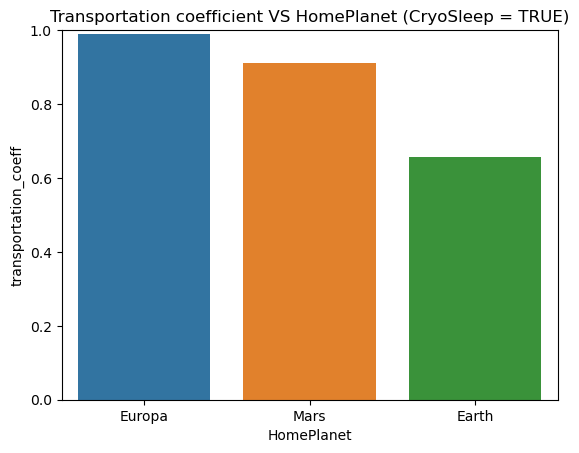

In [20]:
sns.barplot(data=data_barplot, x='HomePlanet', y='transportation_coeff').set(title="Transportation coefficient VS HomePlanet (CryoSleep = TRUE)")
plt.ylim(0, 1)

<p style="color: red;font-size: 18px;"> Results from this plot: </p>
<ul>
  <li>98.9023% of people, who were in CryoSleep and are from Europa were transported </li>
  <li>91.1809% of people, who were in CryoSleep and are from Mars were transported </li>
  <li>65.6295% of people, who were in CryoSleep and are from Earth were transported  </li>
</ul>

In [21]:
data_heatmap = data_CryoSleep.groupby(['HomePlanet','Destination'])\
    .agg(transportation_coeff=('Transported', 'mean'),
         number_of_observations=('Transported', 'count')).reset_index()\
    .sort_values(by='transportation_coeff', ascending=False)
data_heatmap

,HomePlanet,Destination,transportation_coeff,number_of_observations
4,Europa,PSO J318.5-22,1.000000,9
3,Europa,55 Cancri e,0.995465,441
5,Europa,TRAPPIST-1e,0.982103,447
6,Mars,55 Cancri e,0.973684,76
7,Mars,PSO J318.5-22,0.909091,11
8,Mars,TRAPPIST-1e,0.901961,561
0,Earth,55 Cancri e,0.770732,205
1,Earth,PSO J318.5-22,0.673239,355
2,Earth,TRAPPIST-1e,0.616811,809


[Text(0.5, 1.0, 'Heatmap of number of observations')]

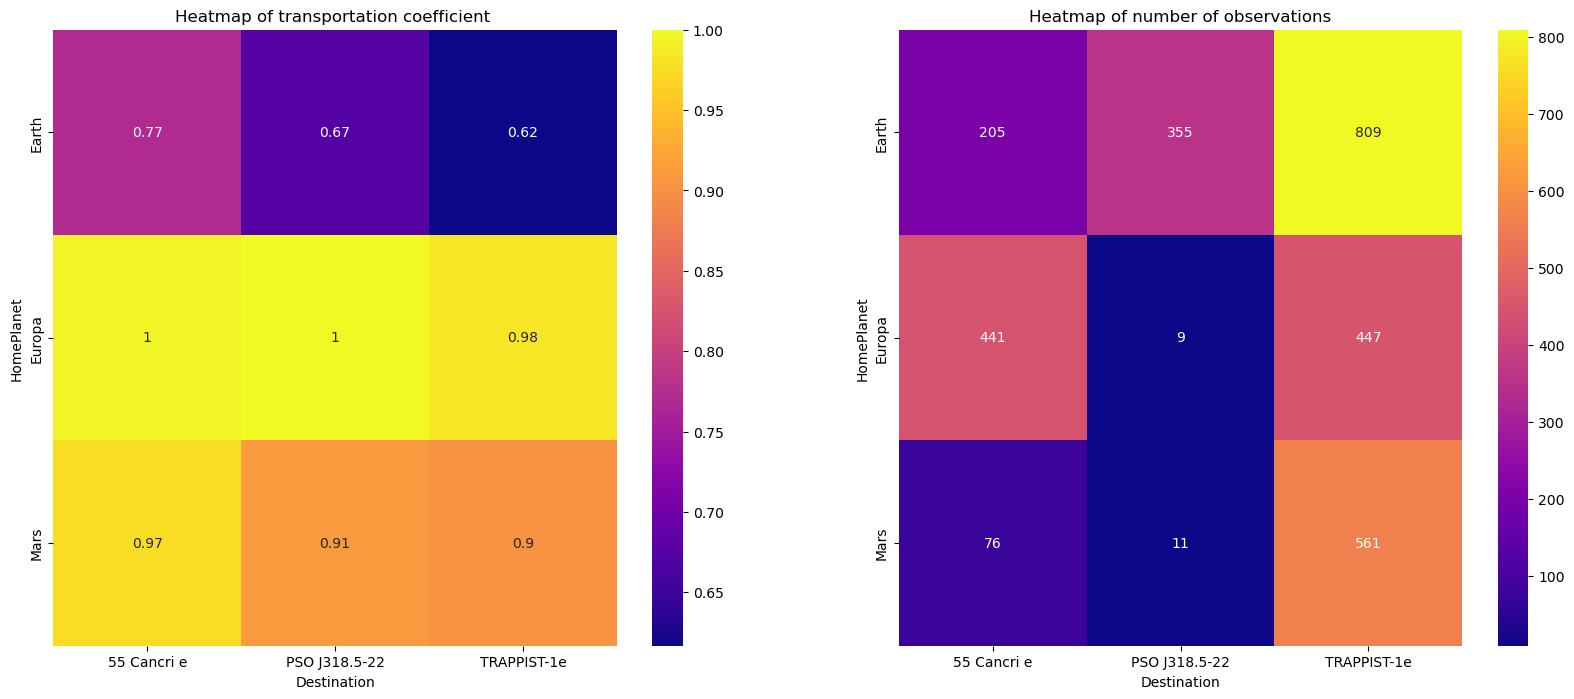

In [22]:
heatmap = data_heatmap.pivot_table(index='HomePlanet', columns='Destination', values='transportation_coeff')
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
sns.heatmap(heatmap, annot=True, cmap='plasma', ax = axes[0]).set(title = "Heatmap of transportation coefficient ")


heatmap = data_heatmap.pivot_table(index='HomePlanet', columns='Destination', values='number_of_observations')
sns.heatmap(heatmap, annot=True, cmap='plasma', fmt='g', ax = axes[1]).set(title = "Heatmap of number of observations")


<p style="color: red;font-size: 18px;">  2.2 Result: </p>
<ul>
  <li>99.5465% of people who were in CryoSleep, are from Europa, and are travelling to 55 Cancri e were transported</li>
  <li>100% of people who were in CryoSleep, are from Europa, and are travelling to PSO J318.5-22	 were transported </li>
  <li>98.2103% of people who were in CryoSleep, are from Europa, and are travelling to TRAPPIST-1e	 were transported</li>
</ul>

In [23]:
data_heatmap = data_CryoSleep.groupby(['HomePlanet','CabinDeck'])\
    .agg(transportation_coeff=('Transported', 'mean'),
         number_of_observations=('Transported', 'count')).reset_index()\
    .sort_values(by='transportation_coeff', ascending=False)
data_heatmap

,HomePlanet,CabinDeck,transportation_coeff,number_of_observations
6,Europa,D,1.000000,68
5,Europa,C,0.993031,287
4,Europa,B,0.992701,411
10,Mars,F,0.992337,522
7,Europa,E,0.980000,50
8,Mars,D,0.969697,33
3,Europa,A,0.939394,66
1,Earth,F,0.727273,11
2,Earth,G,0.658094,1322
0,Earth,E,0.615385,13


In [24]:
new_rows = [{'HomePlanet': 'Europa', 'CabinDeck': 'F', 'transportation_coeff': None, "number_of_observations" :0},
            {'HomePlanet': 'Europa', 'CabinDeck': 'G', 'transportation_coeff': None, "number_of_observations" :0},
            {'HomePlanet': 'Europa', 'CabinDeck': 'T', 'transportation_coeff': None, "number_of_observations" :0},
            {'HomePlanet': 'Earth', 'CabinDeck': 'A', 'transportation_coeff': None, "number_of_observations" :0},
            {'HomePlanet': 'Earth', 'CabinDeck': 'B', 'transportation_coeff': None, "number_of_observations" :0},
            {'HomePlanet': 'Earth', 'CabinDeck': 'C', 'transportation_coeff': None, "number_of_observations" :0},
            {'HomePlanet': 'Earth', 'CabinDeck': 'D', 'transportation_coeff': None, "number_of_observations" :0},
            {'HomePlanet': 'Earth', 'CabinDeck': 'T', 'transportation_coeff': None, "number_of_observations" :0},
            {'HomePlanet': 'Mars', 'CabinDeck': 'T', 'transportation_coeff': None, "number_of_observations" :0},
            {'HomePlanet': 'Mars', 'CabinDeck': 'A', 'transportation_coeff': None, "number_of_observations" :0},
            {'HomePlanet': 'Mars', 'CabinDeck': 'B', 'transportation_coeff': None, "number_of_observations" :0},
            {'HomePlanet': 'Mars', 'CabinDeck': 'C', 'transportation_coeff': None, "number_of_observations" :0},
            {'HomePlanet': 'Mars', 'CabinDeck': 'G', 'transportation_coeff': None, "number_of_observations" :0}
           ]

data_heatmap = pd.concat([data_heatmap, pd.DataFrame(new_rows)], ignore_index=True)
data_heatmap

,HomePlanet,CabinDeck,transportation_coeff,number_of_observations
0,Europa,D,1.000000,68
1,Europa,C,0.993031,287
2,Europa,B,0.992701,411
3,Mars,F,0.992337,522
4,Europa,E,0.980000,50
5,Mars,D,0.969697,33
6,Europa,A,0.939394,66
7,Earth,F,0.727273,11
8,Earth,G,0.658094,1322
9,Earth,E,0.615385,13


[Text(0.5, 1.0, 'Heatmap of number of observations')]

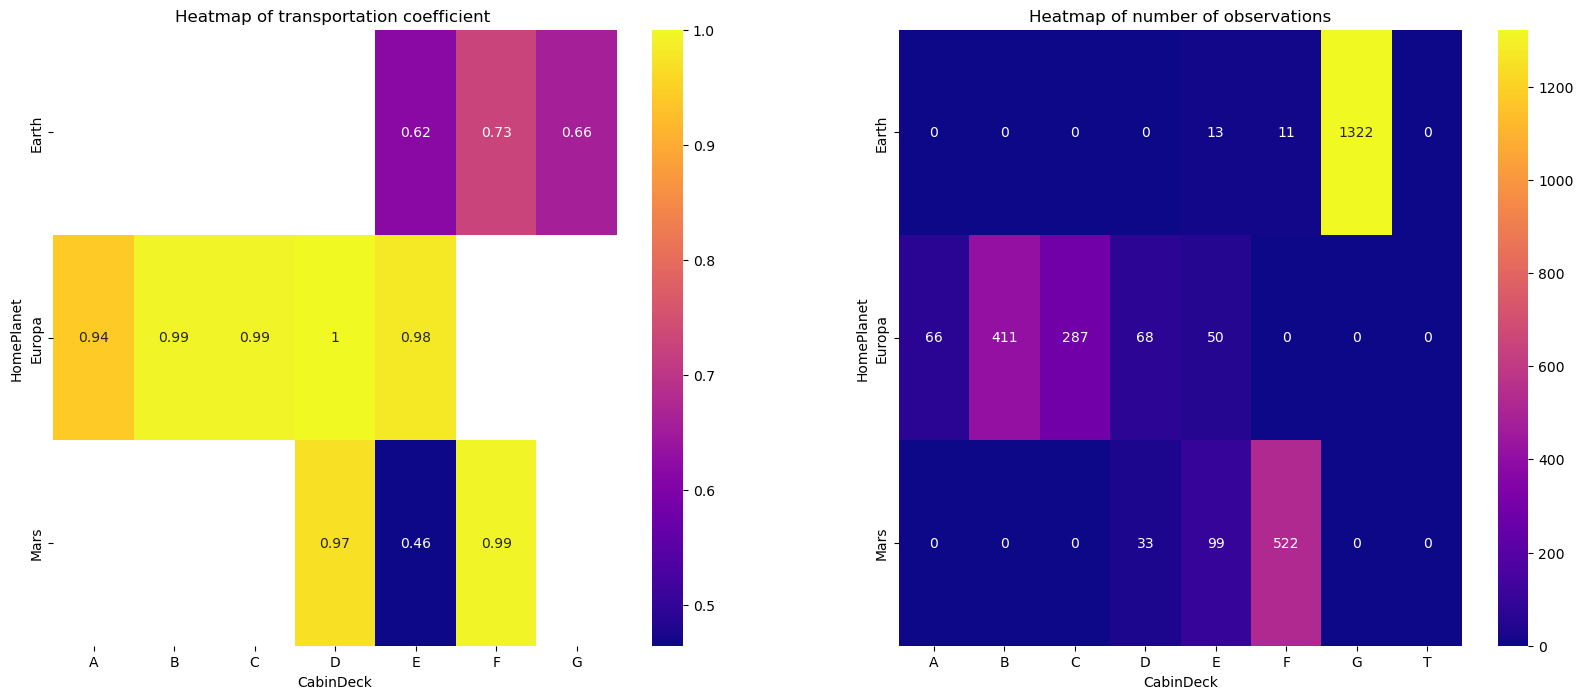

In [25]:
heatmap = data_heatmap.pivot_table(index='HomePlanet', columns='CabinDeck', values='transportation_coeff')
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
sns.heatmap(heatmap, annot=True, cmap='plasma', ax = axes[0]).set(title = "Heatmap of transportation coefficient ")


heatmap = data_heatmap.pivot_table(index='HomePlanet', columns='CabinDeck', values='number_of_observations')
sns.heatmap(heatmap, annot=True, cmap='plasma', fmt='g', ax = axes[1]).set(title = "Heatmap of number of observations")


<span style="font-size: 18px;font-weight: bold;">2.3. What influences the  transportation when people are not in the CryoSleep? </span>

In [26]:
data_barplot = data_not_CryoSleep.groupby('CabinDeck')\
    .agg(transportation_coeff=('Transported', 'mean'),
         number_of_observations=('Transported', 'count')).reset_index()\
    .sort_values(by='transportation_coeff', ascending=False)
data_barplot

,CabinDeck,transportation_coeff,number_of_observations
2,C,0.462791,430
1,B,0.422287,341
6,G,0.350785,1146
0,A,0.324176,182
5,F,0.301930,2176
4,E,0.286337,688
3,D,0.277473,364
7,T,0.250000,4


(0.0, 1.0)

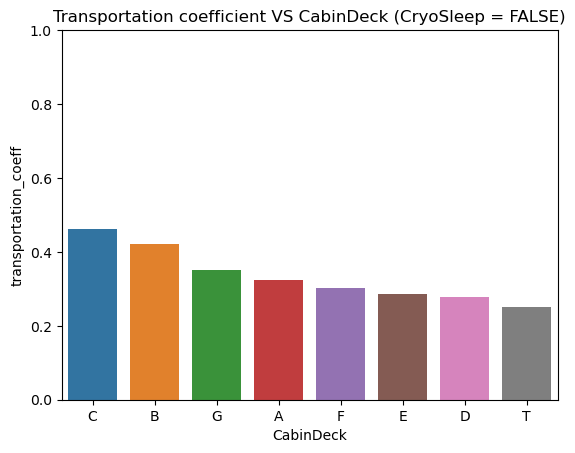

In [27]:
sns.barplot(data=data_barplot, x='CabinDeck', y='transportation_coeff').set(title="Transportation coefficient VS CabinDeck (CryoSleep = FALSE)")
plt.ylim(0, 1)

In [28]:
data_barplot = data_not_CryoSleep.groupby('Destination')\
    .agg(transportation_coeff=('Transported', 'mean'),
         number_of_observations=('Transported', 'count')).reset_index()\
    .sort_values(by='transportation_coeff', ascending=False)
data_barplot

,Destination,transportation_coeff,number_of_observations
0,55 Cancri e,0.380531,1017
1,PSO J318.5-22,0.327411,394
2,TRAPPIST-1e,0.315290,3898


(0.0, 1.0)

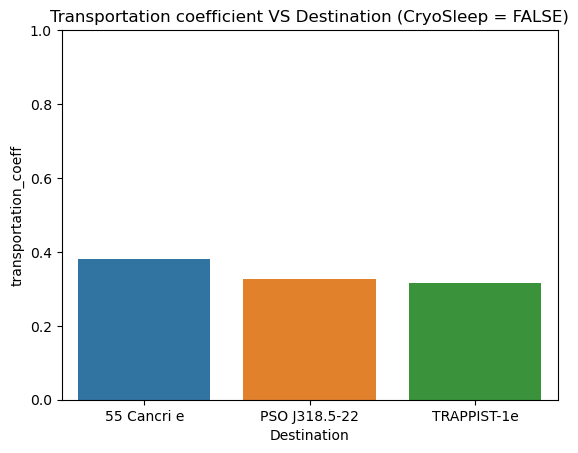

In [29]:
sns.barplot(data=data_barplot, x='Destination', y='transportation_coeff').set(title="Transportation coefficient VS Destination (CryoSleep = FALSE)")
plt.ylim(0, 1)

<p style="color: red;font-size: 18px;"> Results from this plot: </p>
<ul>
  <li>38.0531% of people, who were in not CryoSleep and are travelling to 55 Cancri e were transported </li>
  <li>31.5290% of people, who were in not CryoSleep and are travelling TRAPPIST-1e were transported </li>
  <li>32.7411% of people, who were in not CryoSleep and are travelling to PSO J318.5-22 were transported </li>
</ul>

In [30]:
data_barplot = data_not_CryoSleep.groupby('HomePlanet')\
    .agg(transportation_coeff=('Transported', 'mean'),
         number_of_observations=('Transported', 'count')).reset_index()\
    .sort_values(by='transportation_coeff', ascending=False)
data_barplot

,HomePlanet,transportation_coeff,number_of_observations
1,Europa,0.400172,1162
0,Earth,0.320992,3106
2,Mars,0.276982,1047


(0.0, 1.0)

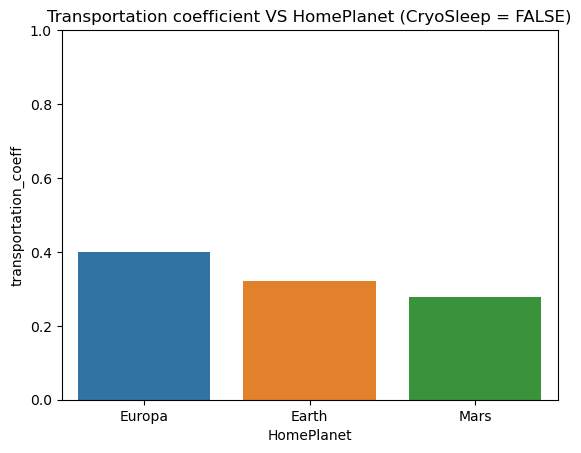

In [31]:
sns.barplot(data=data_barplot, x='HomePlanet', y='transportation_coeff').set(title="Transportation coefficient VS HomePlanet (CryoSleep = FALSE)")
plt.ylim(0, 1)

<p style="color: red;font-size: 18px;"> Results from this plot: </p>
<ul>
  <li>27.6982% of people, who were in CryoSleep and are from Mars were transported </li>
  <li>32.0992% of people, who were in not CryoSleep and are from Earth were transported </li>
  <li>40.0172% of people, who were in not CryoSleep and are from Europa were transported  </li>
</ul>

In [32]:
data_heatmap = data_not_CryoSleep.groupby(['HomePlanet','Destination'])\
    .agg(transportation_coeff=('Transported', 'mean'),
         number_of_observations=('Transported', 'count')).reset_index()\
    .sort_values(by='transportation_coeff', ascending=False)
data_heatmap

,HomePlanet,Destination,transportation_coeff,number_of_observations
4,Europa,PSO J318.5-22,0.500000,10
5,Europa,TRAPPIST-1e,0.414909,711
0,Earth,55 Cancri e,0.387712,472
6,Mars,55 Cancri e,0.375000,112
3,Europa,55 Cancri e,0.373810,420
7,Mars,PSO J318.5-22,0.333333,36
1,Earth,PSO J318.5-22,0.317647,340
2,Earth,TRAPPIST-1e,0.306474,2209
8,Mars,TRAPPIST-1e,0.262799,879


[Text(0.5, 1.0, 'Heatmap of number of observations')]

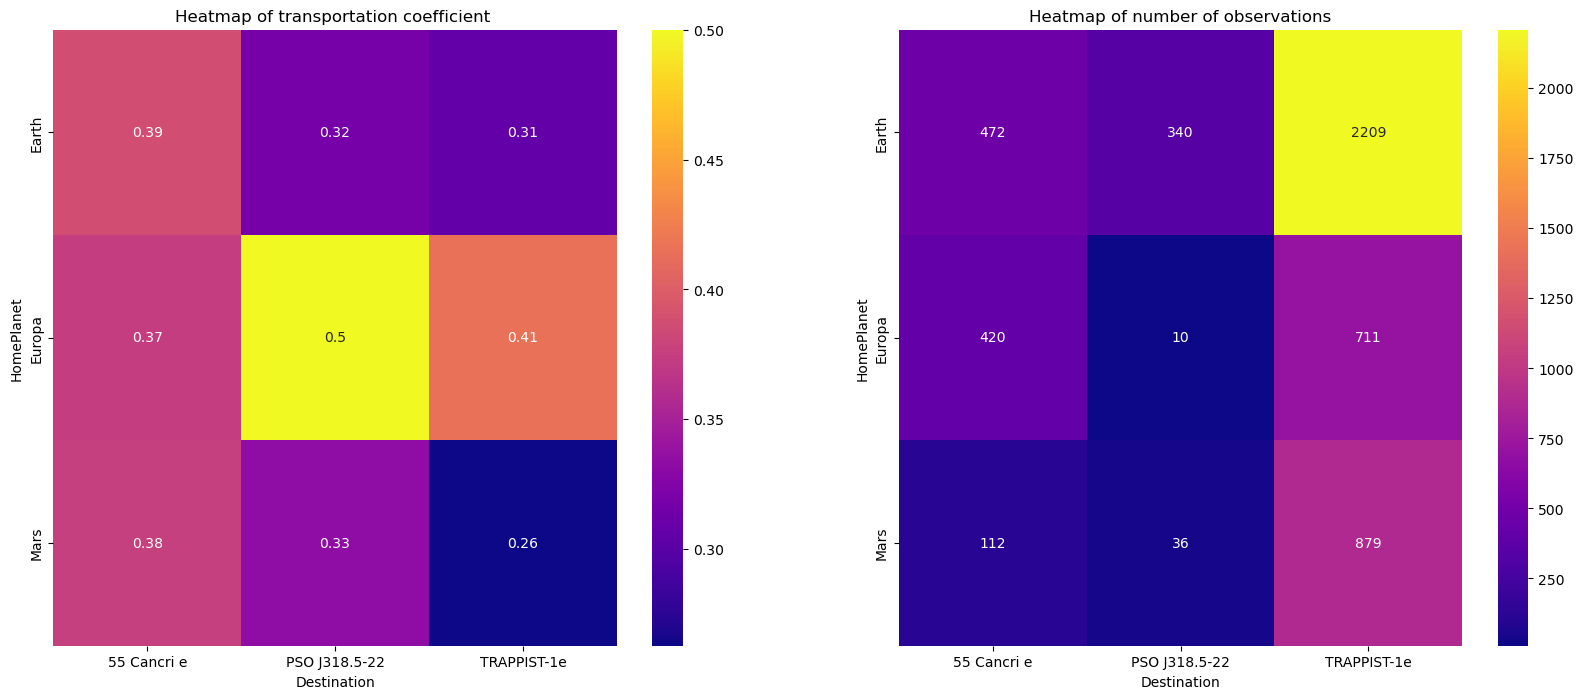

In [33]:
heatmap = data_heatmap.pivot_table(index='HomePlanet', columns='Destination', values='transportation_coeff')
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
sns.heatmap(heatmap, annot=True, cmap='plasma', ax = axes[0]).set(title = "Heatmap of transportation coefficient ")


heatmap = data_heatmap.pivot_table(index='HomePlanet', columns='Destination', values='number_of_observations')
sns.heatmap(heatmap, annot=True, cmap='plasma', fmt='g', ax = axes[1]).set(title = "Heatmap of number of observations")


<span style="font-size: 18px;font-weight: bold;">2.4. Which age groups prefer travelling in CryoSleep? </span>

[Text(0.5, 1.0, 'Number of passengers in different AgeGroups')]

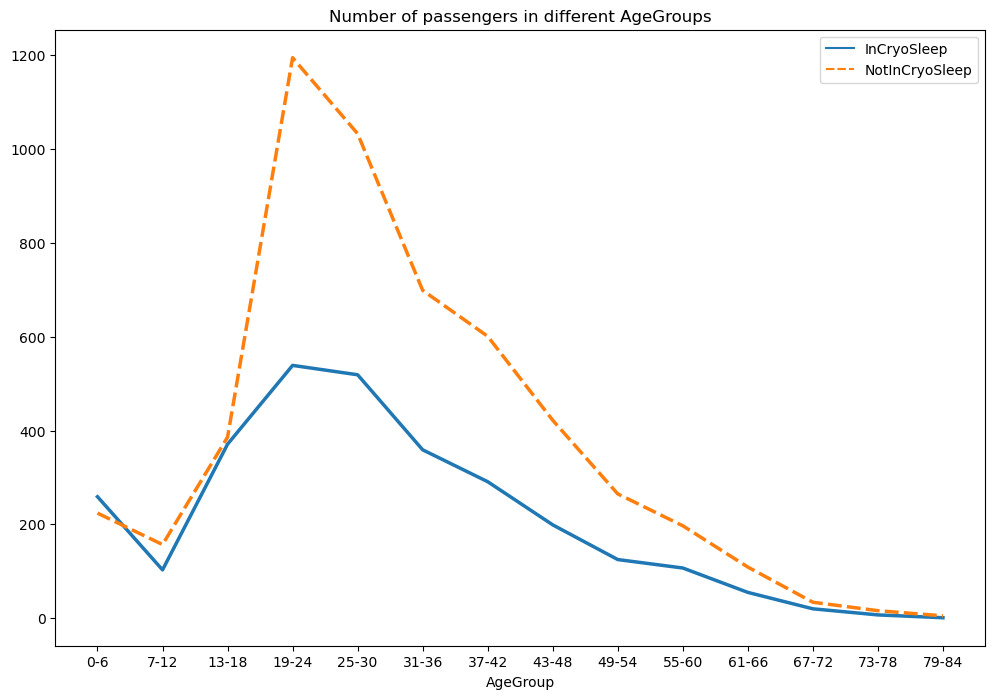

In [34]:
labels = ['0-6', '7-12', '13-18', '19-24', '25-30', '31-36', '37-42', '43-48', '49-54', '55-60', '61-66', '67-72', '73-78', '79-84']
bins = list(range(-1, 85, 6))

data = data_separated.copy()
data.loc[:, 'AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels)

data_age_inCryoSleep = data[data['CryoSleep'] == True]\
    .groupby('AgeGroup')\
    .size()\
    .reset_index(name='InCryoSleep')

data_age_not_inCryoSleep = data[data['CryoSleep'] == False]\
    .groupby('AgeGroup')\
    .size()\
    .reset_index(name='NotInCryoSleep')

data = pd.merge(data_age_inCryoSleep, data_age_not_inCryoSleep, on='AgeGroup', how='outer')
data.set_index('AgeGroup', inplace=True)
data

plt.figure(figsize=(12, 8))
sns.lineplot(data=data, linewidth=2.5).set(title = "Number of passengers in different AgeGroups")

<p style="color: red;font-size: 18px;"> 2.4. Result: </p>
<ul>

  <li>People under 13, and people above 67 choose to use CryoSleep with the same frequency as not being in CryoSleep. People of other ages prefer travelling in CrypSleep</li>
     <li>the biggest difference between people who prefer travelling in CryoSleep or not is seen in in AgeGroup 19-24 </li>
</ul>

<span style="font-size: 18px;font-weight: bold;">2.5. How  the CryoSleep, Age and transportationCoeff are related? </span>

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26],
 [Text(0, 0, '0-2'),
  Text(1, 0, '3-5'),
  Text(2, 0, '6-8'),
  Text(3, 0, '9-11'),
  Text(4, 0, '12-14'),
  Text(5, 0, '15-17'),
  Text(6, 0, '18-20'),
  Text(7, 0, '21-23'),
  Text(8, 0, '24-26'),
  Text(9, 0, '27-29'),
  Text(10, 0, '30-32'),
  Text(11, 0, '33-35'),
  Text(12, 0, '36-38'),
  Text(13, 0, '39-41'),
  Text(14, 0, '42-44'),
  Text(15, 0, '45-47'),
  Text(16, 0, '48-50'),
  Text(17, 0, '51-53'),
  Text(18, 0, '54-56'),
  Text(19, 0, '57-59'),
  Text(20, 0, '60-62'),
  Text(21, 0, '63-65'),
  Text(22, 0, '66-68'),
  Text(23, 0, '69-71'),
  Text(24, 0, '72-74'),
  Text(25, 0, '75-77'),
  Text(26, 0, '78-80')])

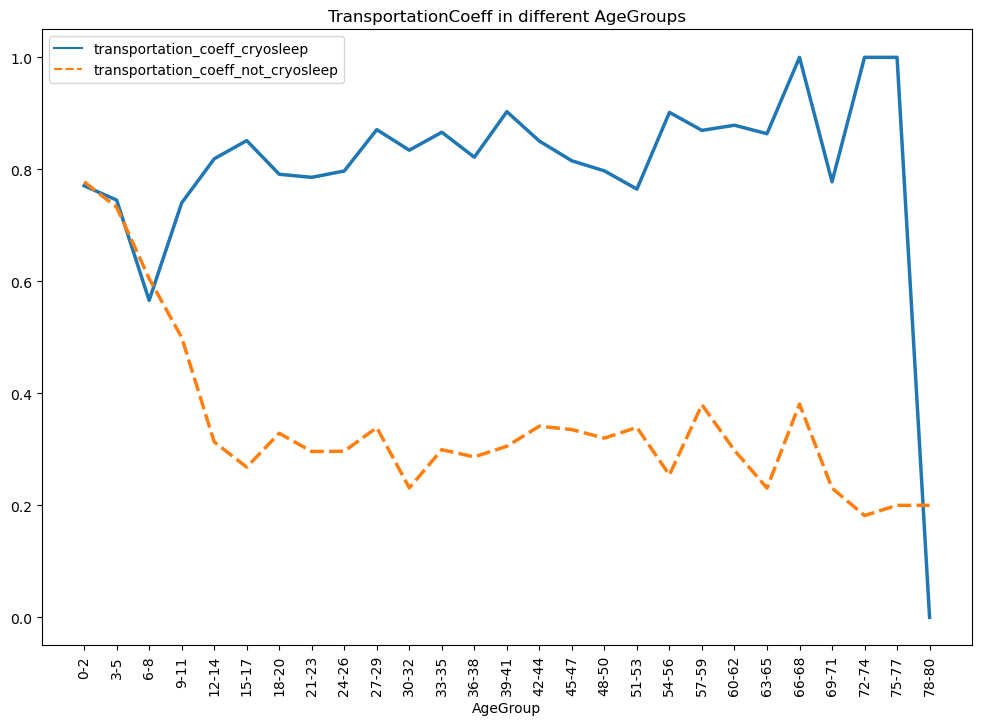

In [35]:
labels = ['0-2', '3-5', '6-8', '9-11', '12-14', '15-17', '18-20', '21-23', '24-26', '27-29', '30-32', '33-35', '36-38', '39-41', '42-44', '45-47', '48-50', '51-53', '54-56', '57-59', '60-62', '63-65', '66-68', '69-71', '72-74', '75-77', '78-80']
bins = list(range(-1, 82, 3))

data = data_separated.copy()
data.loc[:, 'AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels)

dataCr = data[data['CryoSleep'] == True]\
        .groupby('AgeGroup')\
        .agg(transportation_coeff_cryosleep=('Transported', 'mean')).reset_index()

dataNotCr = data[data['CryoSleep'] == False]\
        .groupby('AgeGroup')\
        .agg(transportation_coeff_not_cryosleep=('Transported', 'mean')).reset_index()

data = pd.merge(dataCr, dataNotCr, on='AgeGroup', how='outer')
data.set_index('AgeGroup', inplace=True)

plt.figure(figsize=(12, 8))
sns.lineplot(data=data, linewidth=2.5).set(title = "TransportationCoeff in different AgeGroups")
plt.xticks(rotation=90)

<p style="color: red;font-size: 18px;"> 2.5. Result: </p>
<ul>

  <li>Transportation does not depend on CryoSleep for people of age <= 8, in other groups using of CryoSleep  increases the probability of being transported very much</li>
</ul>

<span style="font-size: 28px;font-weight: bold;">3. What interesting facts can be learned from data about the location of cabins  on the spaceship?</span>

<span style="font-size: 18px;font-weight: bold;">3.1. People from which planets travel in which decks? </span>

In [36]:
data_separated = pd.read_csv("data_separated.csv")
data_separated.groupby(['HomePlanet', 'CabinDeck']).size().reset_index(name='TotalNumberOfPassengers')

new_rows = [{'HomePlanet': 'Earth', 'CabinDeck': 'A', 'TotalNumberOfPassengers': 0},
            {'HomePlanet': 'Earth', 'CabinDeck': 'B', 'TotalNumberOfPassengers': 0},
            {'HomePlanet': 'Earth', 'CabinDeck': 'C', 'TotalNumberOfPassengers': 0},
            {'HomePlanet': 'Earth', 'CabinDeck': 'D', 'TotalNumberOfPassengers': 0},
            {'HomePlanet': 'Earth', 'CabinDeck': 'T', 'TotalNumberOfPassengers': 0},
            {'HomePlanet': 'Europa', 'CabinDeck': 'F', 'TotalNumberOfPassengers': 0},
            {'HomePlanet': 'Europa', 'CabinDeck': 'G', 'TotalNumberOfPassengers': 0},
            {'HomePlanet': 'Mars', 'CabinDeck': 'A', 'TotalNumberOfPassengers': 0},
            {'HomePlanet': 'Mars', 'CabinDeck': 'B', 'TotalNumberOfPassengers': 0},
            {'HomePlanet': 'Mars', 'CabinDeck': 'C', 'TotalNumberOfPassengers': 0},
            {'HomePlanet': 'Mars', 'CabinDeck': 'G', 'TotalNumberOfPassengers': 0},
            {'HomePlanet': 'Mars', 'CabinDeck': 'T', 'TotalNumberOfPassengers': 0},
           ]

data = data_separated.groupby(['HomePlanet', 'CabinDeck']).size().reset_index(name='TotalNumberOfPassengers')
data = pd.concat([data, pd.DataFrame(new_rows)], ignore_index=True)
data

,HomePlanet,CabinDeck,TotalNumberOfPassengers
0,Earth,E,395
1,Earth,F,1614
2,Earth,G,2498
3,Europa,A,252
4,Europa,B,766
5,Europa,C,734
6,Europa,D,186
7,Europa,E,128
8,Europa,T,4
9,Mars,D,282


[Text(0.5, 1.0, 'Heatmap of TotalNumberOfPassengers')]

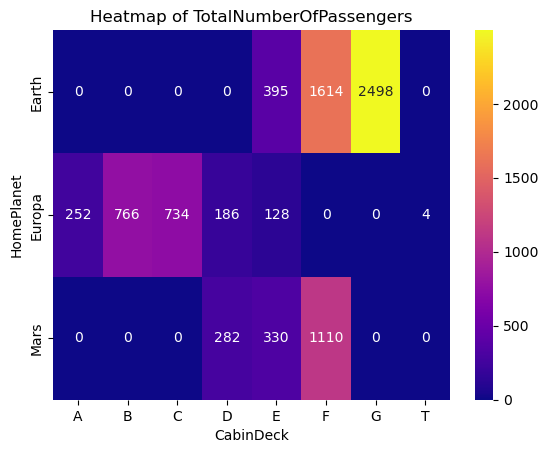

In [37]:
heatmap = data.pivot_table(index='HomePlanet', columns='CabinDeck', values='TotalNumberOfPassengers')
sns.heatmap(heatmap, annot=True, cmap='plasma', fmt='g' ).set(title = "Heatmap of TotalNumberOfPassengers")

<p style="color: red;font-size: 18px;"> 2.5. Result: </p>
<ul>

  <li>People from Earth travel only in CabinDecks E, F, G</li>
  <li>There are only 4 people in CabinDeck T(we already now that they love spa :) )</li>
  <li>People from Mars travel only in CabinDecks D, E, F</li>
  <li>People from Europa travel mostly in CabinDecks B, C (then A, D, E, T)</li>
</ul>

<span style="font-size: 28px;font-weight: bold;">3. Predicting the target value (Transported)</span>

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

data_separated = pd.read_csv("data_separated.csv")

planet_mapping = {'Earth': 1, 'Mars': 2, 'Europa': 3}
cabin_deck_mapping = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'T':8}
cabin_side_mapping = {'P':1, 'S':2}
destination_mapping = {'TRAPPIST-1e': 1, '55 Cancri e':1, "PSO J318.5-22":1}
data_separated['HomePlanetNumeric'] = data_separated['HomePlanet'].map(planet_mapping)
data_separated['DestinationNumeric'] = data_separated['Destination'].map(destination_mapping)
data_separated['CabinDeckNumeric'] = data_separated['CabinDeck'].map(cabin_deck_mapping)
data_separated['CabinSideNumeric'] = data_separated['CabinSide'].map(cabin_side_mapping)

data_separated = data_separated.fillna(0)

accuracy_list1 = [] 

models = [KNeighborsClassifier(), GaussianNB(), RandomForestClassifier(), DecisionTreeClassifier(), LinearSVC(max_iter=10000,dual='auto'), GradientBoostingClassifier(), XGBClassifier(), AdaBoostClassifier() ]

X = data_separated[['CabinNum','IdInGroup','GroupId','CabinSideNumeric','VIP', 'PassengerId','HomePlanetNumeric', 'CryoSleep','DestinationNumeric','Age', 'RoomService', 'FoodCourt','ShoppingMall','Spa','VRDeck','CabinDeckNumeric', 'TotalSpendings']]
y = data_separated['Transported']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

ss_train = StandardScaler()
X_train = ss_train.fit_transform(X_train)

ss_test = StandardScaler()
X_test = ss_test.fit_transform(X_test)

for model in models:
    model_accuracies = []
    for _ in range(10):
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        model_accuracies.append(accuracy)
    mean_accuracy = np.mean(model_accuracies)
    accuracy_list1.append(mean_accuracy)

for model, acc in zip(models, accuracy_list1):
    print(f"{model.__class__.__name__}: Mean Accuracy = {acc:.4f}")


KNeighborsClassifier: Mean Accuracy = 0.7764
GaussianNB: Mean Accuracy = 0.6872
RandomForestClassifier: Mean Accuracy = 0.7385
DecisionTreeClassifier: Mean Accuracy = 0.6209
LinearSVC: Mean Accuracy = 0.7916
GradientBoostingClassifier: Mean Accuracy = 0.7622
XGBClassifier: Mean Accuracy = 0.5906
AdaBoostClassifier: Mean Accuracy = 0.7102


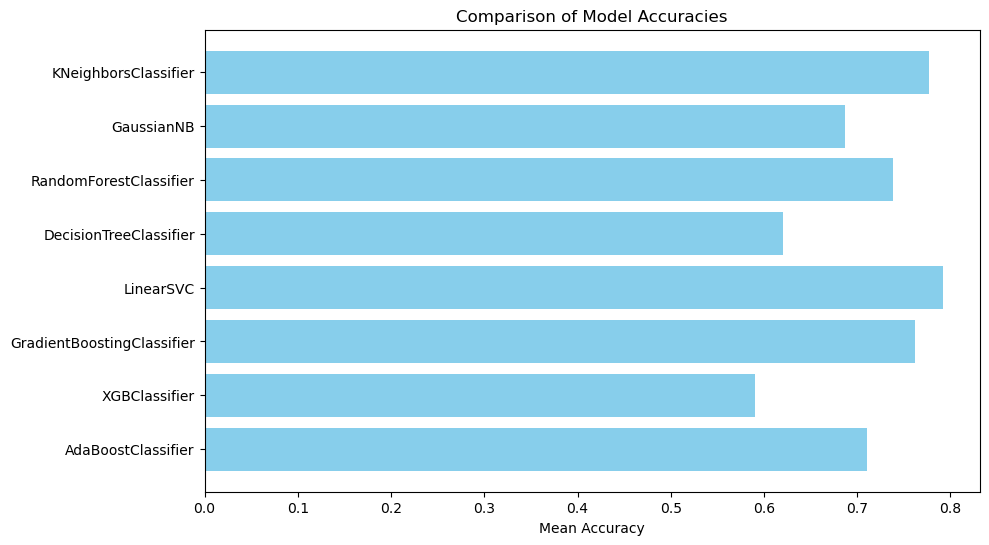

In [39]:
model_names = [model.__class__.__name__ for model in models]

plt.figure(figsize=(10, 6))
plt.barh(model_names, accuracy_list1, color='skyblue')
plt.xlabel('Mean Accuracy')
plt.title('Comparison of Model Accuracies')
plt.gca().invert_yaxis()
plt.show()

<span style="font-size: 18px;font-weight: bold;">Trying to improve our results </span>

In [40]:
data_separated = pd.read_csv("data_separated.csv")
#We know that people, who are in CryoSleep do not buy anything
data_separated.loc[data_separated['CryoSleep'] == True, ['Spa', 'VRDeck', 'FoodCourt','ShoppingMall', 'TotalSpendings', 'RoomService']] = 0

#Filling the missing values with most common values or mean values
most_frequent_category = data_separated['HomePlanet'].mode()[0]
data_separated['HomePlanet'].fillna(most_frequent_category, inplace=True)
most_frequent_category = data_separated['Destination'].mode()[0]
data_separated['Destination'].fillna(most_frequent_category, inplace=True)
most_frequent_category = data_separated['CryoSleep'].mode()[0]
data_separated['CryoSleep'].fillna(most_frequent_category, inplace=True)
most_frequent_category = data_separated['IdInGroup'].mode()[0]
data_separated['IdInGroup'].fillna(most_frequent_category, inplace=True)
most_frequent_category = data_separated['CabinSide'].mode()[0]
data_separated['CabinSide'].fillna(most_frequent_category, inplace=True)
most_frequent_category = data_separated['CabinDeck'].mode()[0]
data_separated['CabinDeck'].fillna(most_frequent_category, inplace=True)

most_frequent_category = data_separated['Age'].mean()
data_separated['Age'].fillna(most_frequent_category, inplace=True)
most_frequent_category = data_separated['RoomService'].mean()
data_separated['RoomService'].fillna(most_frequent_category, inplace=True)
most_frequent_category = data_separated['FoodCourt'].mean()
data_separated['FoodCourt'].fillna(most_frequent_category, inplace=True)
most_frequent_category = data_separated['Spa'].mean()
data_separated['Spa'].fillna(most_frequent_category, inplace=True)
most_frequent_category = data_separated['ShoppingMall'].mean()
data_separated['ShoppingMall'].fillna(most_frequent_category, inplace=True)
most_frequent_category = data_separated['VRDeck'].mean()
data_separated['VRDeck'].fillna(most_frequent_category, inplace=True)

#Creating new features:
data_separated['TotalSpendings'] = data_separated[['RoomService', 'Spa', 'ShoppingMall', 'FoodCourt', 'VRDeck']].sum(axis=1, skipna=True)
data_separated['Spa'] = data_separated['Spa'] / data_separated['TotalSpendings']
data_separated['VRDeck'] = data_separated['VRDeck'] / data_separated['TotalSpendings']
data_separated['FoodCourt'] = data_separated['FoodCourt'] / data_separated['TotalSpendings']
data_separated['ShoppingMall'] = data_separated['ShoppingMall'] / data_separated['TotalSpendings']
data_separated['RoomService'] = data_separated['ShoppingMall'] / data_separated['TotalSpendings']

data_separated = data_separated.fillna(0)

planet_mapping = {'Earth': 1, 'Mars': 2, 'Europa': 3}
cabin_deck_mapping = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'T':8}
cabin_side_mapping = {'P':1, 'S':2}
destination_mapping = {'TRAPPIST-1e': 1, '55 Cancri e':1, "PSO J318.5-22":1}
data_separated['HomePlanetNumeric'] = data_separated['HomePlanet'].map(planet_mapping)
data_separated['DestinationNumeric'] = data_separated['Destination'].map(destination_mapping)
data_separated['CabinDeckNumeric'] = data_separated['CabinDeck'].map(cabin_deck_mapping)
data_separated['CabinSideNumeric'] = data_separated['CabinSide'].map(cabin_side_mapping)

X = data_separated[['CabinNum','IdInGroup','GroupId','CabinSideNumeric','VIP', 'PassengerId','HomePlanetNumeric', 'CryoSleep','DestinationNumeric','Age', 'RoomService', 'FoodCourt','ShoppingMall','Spa','VRDeck','CabinDeckNumeric', 'TotalSpendings']]
y = data_separated['Transported']
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.25, random_state=0)

ss_train = StandardScaler()
X_train = ss_train.fit_transform(X_train)

ss_test = StandardScaler()
X_test = ss_test.fit_transform(X_test)

accuracy_list2 = [] 

models = [KNeighborsClassifier(), GaussianNB(), RandomForestClassifier(), DecisionTreeClassifier(), LinearSVC(max_iter=10000,dual='auto'), GradientBoostingClassifier(), XGBClassifier(), AdaBoostClassifier() ]

for model in models:
    model_accuracies = []
    for _ in range(10):
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        model_accuracies.append(accuracy)
    mean_accuracy = np.mean(model_accuracies)
    accuracy_list2.append(mean_accuracy)

for model, acc in zip(models, accuracy_list2):
    print(f"{model.__class__.__name__}: Mean Accuracy = {acc:.4f}")
    

KNeighborsClassifier: Mean Accuracy = 0.7916
GaussianNB: Mean Accuracy = 0.7116
RandomForestClassifier: Mean Accuracy = 0.7964
DecisionTreeClassifier: Mean Accuracy = 0.7326
LinearSVC: Mean Accuracy = 0.7866
GradientBoostingClassifier: Mean Accuracy = 0.8004
XGBClassifier: Mean Accuracy = 0.6279
AdaBoostClassifier: Mean Accuracy = 0.7916


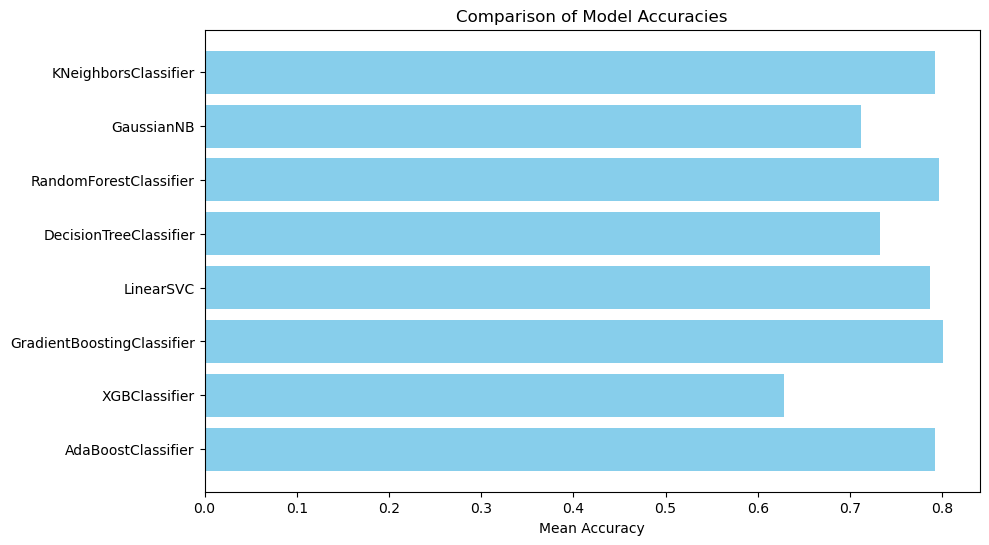

In [41]:
model_names = [model.__class__.__name__ for model in models]

plt.figure(figsize=(10, 6))
plt.barh(model_names, accuracy_list2, color='skyblue')
plt.xlabel('Mean Accuracy')
plt.title('Comparison of Model Accuracies')
plt.gca().invert_yaxis()
plt.show()

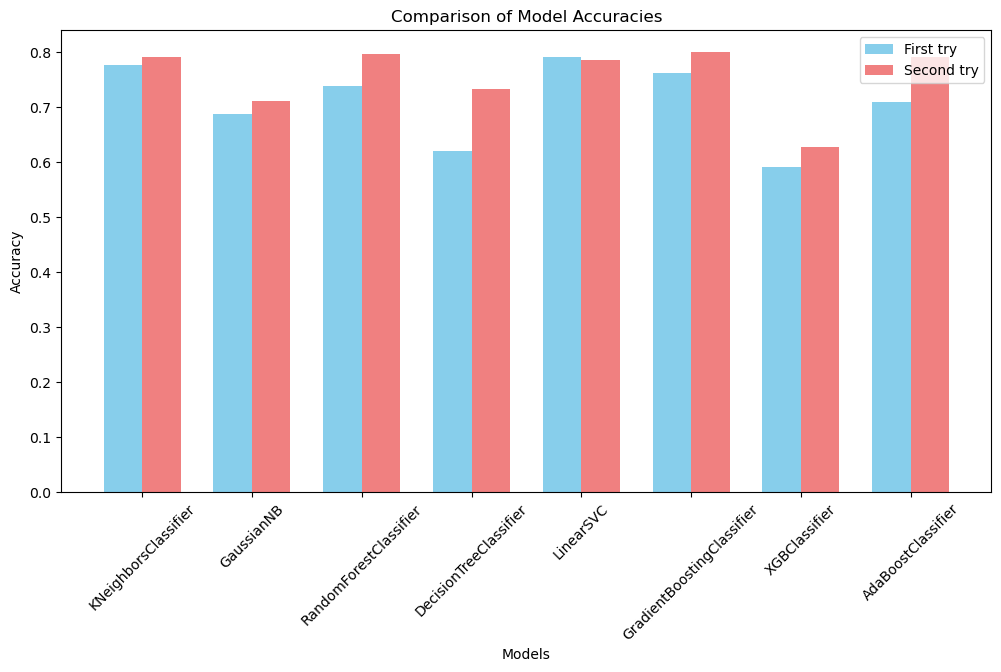

In [42]:
model_names = [model.__class__.__name__ for model in models]

index = np.arange(len(model_names))

bar_width = 0.35

plt.figure(figsize=(12, 6))
plt.bar(index, accuracy_list1, bar_width, label='First try', color='skyblue')
plt.bar(index + bar_width, accuracy_list2, bar_width, label='Second try', color='lightcoral')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.xticks(index + bar_width / 2, model_names, rotation=45)
plt.legend()
plt.show()

The best accuracy that was reached is 0.8004 by GradientBoostingClassifier using our new features.
And we see that our missing values filling and additing of new features improved performance of all our models (but not LinearSVC)